##### Names: 
#####      Mohammed Amour Al-Marshudi ~ 16S194
#####   		   Israa Dawood Al-Rashdi     ~ 1618134
        
        
  ##  _____________________________________________________      
        
        
##### Data From: https://www.kaggle.com/datasets/mylesoneill/world-university-rankings?select=cwurData.csv
  
  
##    Topic: World University Rankings

# First we need to import pandas to create a DataFrame and use some function 
# Second we need to import numpy to use some functions

In [196]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [197]:
wur=pd.read_csv("WorldUniversityRankings.csv")
wur

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1.0,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2.0,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3.0,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,3.0,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
4,4.0,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,996.0,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2198,997.0,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2199,998.0,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2200,999.0,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


# Data Cleaning

# 1. we need to **drop(clean)** some useless columns in table



# - no need for these columns:
	 
    
    "alumni_employment"
    "publications"
    "influence"
    "broad_impact"
    "patents"

In [198]:
wur=wur.drop(columns={"alumni_employment","publications","influence","broad_impact","patents"})

In [199]:
wur

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
0,1.0,Harvard University,USA,1,7,1,1,100.00,2012
1,2.0,Massachusetts Institute of Technology,USA,2,9,3,4,91.67,2012
2,3.0,Stanford University,USA,3,17,5,2,89.50,2012
3,3.0,Stanford University,USA,3,17,5,2,89.50,2012
4,4.0,University of Cambridge,United Kingdom,1,10,4,11,86.17,2012
...,...,...,...,...,...,...,...,...,...
2197,996.0,University of the Algarve,Portugal,7,367,218,812,44.03,2015
2198,997.0,Alexandria University,Egypt,4,236,218,645,44.03,2015
2199,998.0,Federal University of Ceará,Brazil,18,367,218,812,44.03,2015
2200,999.0,University of A Coruña,Spain,40,367,218,812,44.02,2015


#  ###############################################################

In [200]:
#divide the table acording to the year 
wur[(wur["year"]=="2013")]


,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
101,1.0,Harvard University,USA,1,1,1,1,100.00,2013
102,2.0,Stanford University,USA,2,11,4,2,93.94,2013
103,3.0,University of Oxford,United Kingdom,1,7,10,13,92.54,2013
104,4.0,Massachusetts Institute of Technology,USA,3,2,2,3,91.45,2013
105,5.0,University of Cambridge,United Kingdom,2,3,5,10,90.24,2013
...,...,...,...,...,...,...,...,...,...
197,96.0,Australian National University,Australia,2,101,43,101,44.50,2013
198,97.0,University of Alberta,Canada,4,101,101,92,44.50,2013
199,98.0,University of Helsinki,Finland,1,69,81,71,44.39,2013
200,99.0,Paris Diderot University - Paris 7,France,5,28,72,101,44.36,2013


In [201]:
# check if there are any duplicated rows in the datasets and drop it 

In [202]:
# check if there are any duplicated rows in the datasets

wur[(wur["world_rank"].duplicated()) & (wur["year"]==2012)]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year


In [203]:
wur[(wur["year"]==2013) & (wur["world_rank"].duplicated())]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year


### as we can see we cannot manipulate the data because the year is is having
### "null values" and "wrong data type"

#  #########################################################

# 2. we need to find and check any **null or wrong** values in the dataset

In [204]:
wur

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
0,1.0,Harvard University,USA,1,7,1,1,100.00,2012
1,2.0,Massachusetts Institute of Technology,USA,2,9,3,4,91.67,2012
2,3.0,Stanford University,USA,3,17,5,2,89.50,2012
3,3.0,Stanford University,USA,3,17,5,2,89.50,2012
4,4.0,University of Cambridge,United Kingdom,1,10,4,11,86.17,2012
...,...,...,...,...,...,...,...,...,...
2197,996.0,University of the Algarve,Portugal,7,367,218,812,44.03,2015
2198,997.0,Alexandria University,Egypt,4,236,218,645,44.03,2015
2199,998.0,Federal University of Ceará,Brazil,18,367,218,812,44.03,2015
2200,999.0,University of A Coruña,Spain,40,367,218,812,44.02,2015


In [205]:
wur.isnull().sum()

world_rank               9
institution              0
country                  1
national_rank            0
quality_of_education     0
quality_of_faculty       0
citations                0
score                    6
year                    16
dtype: int64

In [206]:
wur["country"].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'Canada', 'France', 'Sweden', 'South Korea', 'Italy', 'Germany',
       'Netherlands', 'Finland', 'Norway', 'Australia', 'Denmark',
       'Singapore', 'Russia', '?', 'China', 'Taiwan', nan, 'Belgium',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [207]:
#replace country "?" with null values
wur["country"].replace("?",np.nan,inplace=True)

In [208]:
#replace year "?" with null values
wur["year"].replace("?",np.nan,inplace=True)

In [209]:
wur["year"].unique()

array(['2012', nan, '2013', '2014', '2015'], dtype=object)

In [210]:
wur["country"].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'Canada', 'France', 'Sweden', 'South Korea', 'Italy', 'Germany',
       'Netherlands', 'Finland', 'Norway', 'Australia', 'Denmark',
       'Singapore', 'Russia', nan, 'China', 'Taiwan', 'Belgium',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

# 3. we need to fill the table **with appropriate** values in the dataset

In [211]:
#the right method to fill for "year" is forward filling 

wur["year"].fillna(method="ffill",inplace=True)

In [212]:
wur=wur.astype({"year":int})

In [213]:
wur.dtypes

world_rank              float64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
quality_of_faculty        int64
citations                 int64
score                   float64
year                      int32
dtype: object

In [214]:
wur.isnull().sum()

world_rank              9
institution             0
country                 2
national_rank           0
quality_of_education    0
quality_of_faculty      0
citations               0
score                   6
year                    0
dtype: int64

In [215]:
# null world_rank
wur[wur["world_rank"].isnull()]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
24,NaN,"University of California, San Francisco",USA,17,101,21,13,59.70,2012
212,NaN,Cornell University,USA,9,12,19,23,85.80,2014
535,NaN,Gwangju Institute of Science and Technology,South Korea,9,355,210,406,46.02,2014
584,NaN,Scuola Normale Superiore di Pisa,Italy,16,229,64,363,45.63,2014
633,NaN,University of Bordeaux I,France,17,355,210,406,45.41,2014
1244,NaN,"Purdue University, West Lafayette",USA,27,55,47,68,56.39,2015
1254,NaN,"University of California, Davis",USA,36,54,59,35,54.85,2015
1405,NaN,University of Erlangen-Nuremberg,Germany,13,231,218,146,47.36,2015
1588,NaN,Catholic University of the Sacred Heart,Italy,18,367,218,321,45.22,2015


In [216]:
# null score
wur[wur["score"].isnull()]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
8,8.0,Yale University,USA,6,14,12,15,NaN,2012
33,33.0,Northwestern University,USA,23,101,101,20,NaN,2012
221,20.0,"University of California, San Diego",USA,15,32,20,19,NaN,2014
330,129.0,Radboud University Nijmegen,Netherlands,6,118,210,114,NaN,2014
408,207.0,University of Georgia,USA,87,104,169,187,NaN,2014
484,283.0,Chulalongkorn University,Thailand,1,355,210,406,NaN,2014


In [217]:
# null country
wur[wur["country"].isnull()]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
250,49.0,"University of Minnesota, Twin Cities",NaN,31,61,83,29,56.13,2014
271,70.0,University of Arizona,NaN,45,99,87,37,53.77,2014


# divide the table acording to the year 

In [218]:

wur12=wur[(wur["year"]==2012)]
wur13=wur[(wur["year"]==2013)]
wur14=wur[(wur["year"]==2014)]
wur15=wur[(wur["year"]==2015)]

# check if there are any duplicated rows in the datasets and drop it 


In [219]:
# check if there are any duplicated rows in the datasets

wur12[(wur12["world_rank"].duplicated())]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
3,3.0,Stanford University,USA,3,17,5,2,89.5,2012


In [220]:
wur12=wur12.drop_duplicates(subset=["world_rank"], keep=False)


In [221]:
wur13[(wur13["world_rank"].duplicated())]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
181,80.0,"Texas A&M University, College Station",USA,50,101,50,88,46.17,2013


In [222]:
wur13=wur13.drop_duplicates(subset=["world_rank"], keep=False)

In [223]:
wur13[(wur13["world_rank"].duplicated())]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year


# here there are no dublicated values but there are Null values that need to be handled

In [224]:
wur14[(wur14["world_rank"].duplicated())]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
535,NaN,Gwangju Institute of Science and Technology,South Korea,9,355,210,406,46.02,2014
584,NaN,Scuola Normale Superiore di Pisa,Italy,16,229,64,363,45.63,2014
633,NaN,University of Bordeaux I,France,17,355,210,406,45.41,2014


In [225]:
wur15[(wur15["world_rank"].duplicated())]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
1254,NaN,"University of California, Davis",USA,36,54,59,35,54.85,2015
1405,NaN,University of Erlangen-Nuremberg,Germany,13,231,218,146,47.36,2015
1588,NaN,Catholic University of the Sacred Heart,Italy,18,367,218,321,45.22,2015


In [226]:
#check if there is somthing worng or missing in the data
wur12["world_rank"].unique()

array([  1.,   2.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        nan,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.])

In [227]:
wur13["world_rank"].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.])

In [228]:
wur14["world_rank"].unique()

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   nan,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,
         82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
         91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,
        100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,
        109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,  117.,
        118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,  126.,
        127.,  128.,

In [229]:
#lets find the rank values
wur15["world_rank"].unique()

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   nan,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   54.,   55.,
         56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,   64.,
         65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,   73.,
         74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,   82.,
         83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,   91.,
         92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,  100.,
        101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,  109.,
        110.,  111.,  112.,  113.,  114.,  115.,  116.,  117.,  118.,
        119.,  120.,  121.,  122.,  123.,  124.,  125.,  126.,  127.,
        128.,  129.,

In [230]:
print("Null in 2012 rank: ",wur12["world_rank"].isnull().sum())
print("Null in 2013 rank: ",wur13["world_rank"].isnull().sum())
print("Null in 2014 rank: ",wur14["world_rank"].isnull().sum())
print("Null in 2015 rank: ",wur15["world_rank"].isnull().sum())

Null in 2012 rank:  1
Null in 2013 rank:  0
Null in 2014 rank:  4
Null in 2015 rank:  4


In [231]:
#lets find the score values score

print("Null in 2012 score: ",wur12["score"].isnull().sum())
print("Null in 2013 score: ",wur13["score"].isnull().sum())
print("Null in 2014 score: ",wur14["score"].isnull().sum())
print("Null in 2015 score: ",wur15["score"].isnull().sum())

Null in 2012 score:  2
Null in 2013 score:  0
Null in 2014 score:  4
Null in 2015 score:  0


In [232]:
wur.isnull().sum()

world_rank              9
institution             0
country                 2
national_rank           0
quality_of_education    0
quality_of_faculty      0
citations               0
score                   6
year                    0
dtype: int64

In [233]:
#join all the devided table back to the orignal data frame wur
wur = pd.concat([wur12, wur13, wur14, wur15], ignore_index=True)


In [234]:
wur[wur["world_rank"].isnull()]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
22,NaN,"University of California, San Francisco",USA,17,101,21,13,59.70,2012
208,NaN,Cornell University,USA,9,12,19,23,85.80,2014
531,NaN,Gwangju Institute of Science and Technology,South Korea,9,355,210,406,46.02,2014
580,NaN,Scuola Normale Superiore di Pisa,Italy,16,229,64,363,45.63,2014
629,NaN,University of Bordeaux I,France,17,355,210,406,45.41,2014
1240,NaN,"Purdue University, West Lafayette",USA,27,55,47,68,56.39,2015
1250,NaN,"University of California, Davis",USA,36,54,59,35,54.85,2015
1401,NaN,University of Erlangen-Nuremberg,Germany,13,231,218,146,47.36,2015
1584,NaN,Catholic University of the Sacred Heart,Italy,18,367,218,321,45.22,2015


In [235]:
wur[wur["score"].isnull()]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
6,8.0,Yale University,USA,6,14,12,15,NaN,2012
31,33.0,Northwestern University,USA,23,101,101,20,NaN,2012
217,20.0,"University of California, San Diego",USA,15,32,20,19,NaN,2014
326,129.0,Radboud University Nijmegen,Netherlands,6,118,210,114,NaN,2014
404,207.0,University of Georgia,USA,87,104,169,187,NaN,2014
480,283.0,Chulalongkorn University,Thailand,1,355,210,406,NaN,2014


In [236]:
wur[wur["country"].isnull()]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
246,49.0,"University of Minnesota, Twin Cities",NaN,31,61,83,29,56.13,2014
267,70.0,University of Arizona,NaN,45,99,87,37,53.77,2014


# finding outliers in the DataFrame

In [237]:
wur.describe()

,world_rank,national_rank,quality_of_education,quality_of_faculty,citations,score,year
count,2189.000000,2198.000000,2198.000000,2198.000000,2198.000000,2192.000000,2198.000000
mean,461.007766,45.345314,275.297088,179.025933,413.752502,47.939849,2014.319836
std,304.199386,241.739637,121.809471,63.913280,264.249766,11.603804,0.760350
min,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,177.000000,6.000000,176.250000,176.000000,161.000000,44.460000,2014.000000
50%,453.000000,21.000000,355.000000,210.000000,406.000000,45.090000,2014.000000
75%,727.000000,49.000000,367.000000,218.000000,645.000000,47.520000,2015.000000
max,1000.000000,11111.000000,367.000000,218.000000,812.000000,455.000000,2015.000000


<AxesSubplot:>

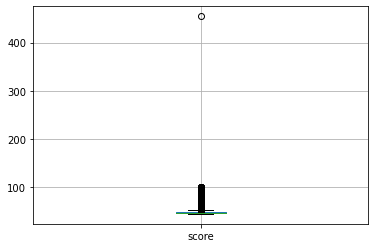

In [238]:
wur.boxplot('score')
#there is an outlier

<AxesSubplot:>

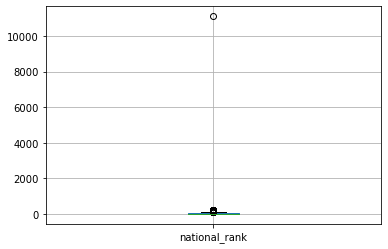

In [239]:
wur.boxplot('national_rank')
#there is an outlier

<AxesSubplot:>

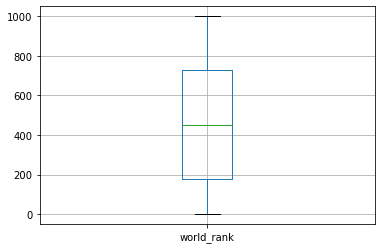

In [240]:
wur.boxplot('world_rank')
# looks normal

In [241]:
wur[wur["score"]>99]

# Japan in index 587 is considered to be an outlier 
# Logically for the score
# Minimum score for this is 0 and maximum is 100

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
0,1.0,Harvard University,USA,1,7,1,1,100.00,2012
99,1.0,Harvard University,USA,1,1,1,1,100.00,2013
198,1.0,Harvard University,USA,1,1,1,1,100.00,2014
199,2.0,Stanford University,USA,2,11,4,3,99.09,2014
583,386.0,Chiba University,Japan,18,355,210,406,455.00,2014
1198,1.0,Harvard University,USA,1,1,1,1,100.00,2015


In [242]:
wur[wur["national_rank"]>2000]

# Canada in index 232 is considered to be an outlier 


,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
228,31.0,University of Toronto,Canada,11111,71,35,13,60.87,2014


In [243]:
# Convert national_rank outliers to null
wur.loc[wur["national_rank"] > 2000, "national_rank"] = np.nan

# Convert score outliers to null
wur.loc[wur["score"] > 101, "score"] = np.nan

In [244]:
wur.describe()

,world_rank,national_rank,quality_of_education,quality_of_faculty,citations,score,year
count,2189.000000,2197.000000,2198.000000,2198.000000,2198.000000,2191.000000,2198.000000
mean,461.007766,40.308603,275.297088,179.025933,413.752502,47.754062,2014.319836
std,304.199386,51.762879,121.809471,63.913280,264.249766,7.682061,0.760350
min,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,177.000000,6.000000,176.250000,176.000000,161.000000,44.460000,2014.000000
50%,453.000000,21.000000,355.000000,210.000000,406.000000,45.090000,2014.000000
75%,727.000000,49.000000,367.000000,218.000000,645.000000,47.520000,2015.000000
max,1000.000000,229.000000,367.000000,218.000000,812.000000,100.000000,2015.000000


<AxesSubplot:>

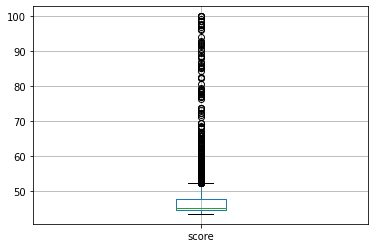

In [245]:
wur.boxplot('score')

<AxesSubplot:>

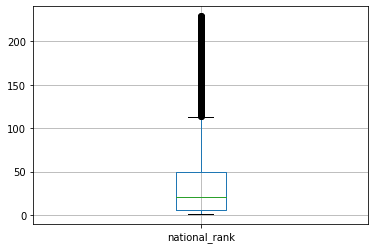

In [246]:
wur.boxplot('national_rank')

This code snippet fills in missing values in the 'world_rank' column of a DataFrame called 'wur' using linear interpolation. Linear interpolation is a method for estimating a value that falls between two known values.

The code then loops through each row in the DataFrame and checks if the 'world_rank' column is missing a value. If it is missing, the code finds the previous and next non-missing values by searching backward and forward from the current row.

Once the previous and next non-missing values have been found, the missing value is estimated by taking the average of the previous and next values. Finally, the missing value is replaced with the estimated value.

In [247]:

# Fill in missing values using linear interpolation
wur = wur.interpolate()

# Loop through each row in the DataFrame
for idx, row in wur.iterrows():
    # Check if the 'world_rank' column is missing
    if pd.isna(row['world_rank']):
        # Find the previous and next non-missing values
        prev_idx = idx - 1
        while prev_idx >= 0 and pd.isna(wur.loc[prev_idx, 'world_rank']):
            prev_idx -= 1
        next_idx = idx + 1
        while next_idx < len(df) and pd.isna(wur.loc[next_idx, 'world_rank']):
            next_idx += 1
            
        # Interpolate the missing value
        value = (wur.loc[prev_idx, 'world_rank'] + wur.loc[next_idx, 'world_rank']) / 2
        wur.loc[idx, 'world_rank'] = value


In [248]:
wur.isnull().sum()

world_rank              0
institution             0
country                 2
national_rank           0
quality_of_education    0
quality_of_faculty      0
citations               0
score                   0
year                    0
dtype: int64

In [249]:
countryMiss=wur[wur["country"].isnull()]
countryMiss

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
246,49.0,"University of Minnesota, Twin Cities",NaN,31.0,61,83,29,56.13,2014
267,70.0,University of Arizona,NaN,45.0,99,87,37,53.77,2014


In [250]:
wur[wur["institution"]=="University of Arizona"]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
48,50.0,University of Arizona,USA,37.0,101,88,45,50.29,2012
176,78.0,University of Arizona,USA,49.0,101,90,49,46.39,2013
267,70.0,University of Arizona,NaN,45.0,99,87,37,53.77,2014
1265,68.0,University of Arizona,USA,42.0,139,87,31,53.26,2015


In [251]:
wur[wur["institution"]=="University of Minnesota, Twin Cities"]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
47,49.0,"University of Minnesota, Twin Cities",USA,36.0,101,85,17,50.30,2012
142,44.0,"University of Minnesota, Twin Cities",USA,31.0,101,87,16,50.98,2013
246,49.0,"University of Minnesota, Twin Cities",NaN,31.0,61,83,29,56.13,2014
1245,48.0,"University of Minnesota, Twin Cities",USA,31.0,63,63,31,55.51,2015


we will take the same **institution** name in other **years** and take the country name and fill the missing values  

In [252]:
# Loop through each row in the DataFrame
for idx, row in wur.iterrows():
    # Check if the 'country' column is missing
    if pd.isna(row['country']):
        # Find the rows with the same 'institution' name
        institution = row['institution']
        matches = wur[wur['institution'] == institution]
        # Find the first non-missing 'country' value in the matches
        country = matches['country'].dropna().iloc[0]
        # Fill in the missing value
        wur.loc[idx, 'country'] = country

# 4. we need to recheck  the dataset and make sure everything is alright

In [253]:
wur.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
quality_of_faculty      0
citations               0
score                   0
year                    0
dtype: int64

In [254]:

wur[wur["institution"]=="University of Arizona"]


,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
48,50.0,University of Arizona,USA,37.0,101,88,45,50.29,2012
176,78.0,University of Arizona,USA,49.0,101,90,49,46.39,2013
267,70.0,University of Arizona,USA,45.0,99,87,37,53.77,2014
1265,68.0,University of Arizona,USA,42.0,139,87,31,53.26,2015


In [255]:
wur[wur["institution"]=="University of Minnesota, Twin Cities"]

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
47,49.0,"University of Minnesota, Twin Cities",USA,36.0,101,85,17,50.30,2012
142,44.0,"University of Minnesota, Twin Cities",USA,31.0,101,87,16,50.98,2013
246,49.0,"University of Minnesota, Twin Cities",USA,31.0,61,83,29,56.13,2014
1245,48.0,"University of Minnesota, Twin Cities",USA,31.0,63,63,31,55.51,2015


### re devide again the DataFrame acording to the year 

In [256]:
wur12=wur[(wur["year"]==2012)]
wur13=wur[(wur["year"]==2013)]
wur14=wur[(wur["year"]==2014)]
wur15=wur[(wur["year"]==2015)]

# Exploratory Data Analysis (EDA)

In [257]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sn

In [258]:
# Find correlation between variables
wur.corr()

C:\Users\Eddie\AppData\Local\Temp\ipykernel_34536\2848100972.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,world_rank,national_rank,quality_of_education,quality_of_faculty,citations,score,year
world_rank,1.000000,0.238272,0.675497,0.663166,0.856321,-0.549557,0.318951
national_rank,0.238272,1.000000,0.211581,0.222500,0.186435,-0.199130,0.102363
quality_of_education,0.675497,0.211581,1.000000,0.785464,0.629654,-0.600328,0.425494
quality_of_faculty,0.663166,0.222500,0.785464,1.000000,0.651414,-0.693473,0.482041
citations,0.856321,0.186435,0.629654,0.651414,1.000000,-0.522592,0.326852
score,-0.549557,-0.199130,-0.600328,-0.693473,-0.522592,1.000000,-0.234163
year,0.318951,0.102363,0.425494,0.482041,0.326852,-0.234163,1.000000


The values range from **-1 to 1**, with **1 indicating a perfect positive correlation**, **0** indicating **no correlation**, and **-1** indicating a **perfect negative correlation**.

C:\Users\Eddie\AppData\Local\Temp\ipykernel_34536\692974398.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

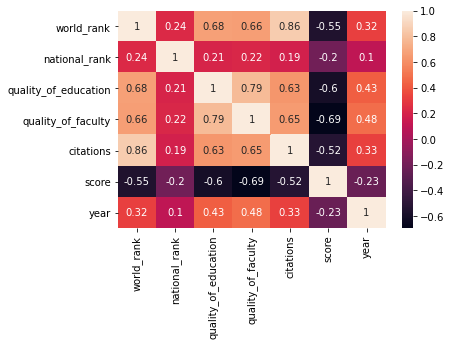

In [259]:
# Visualize correlation between variables
sn.heatmap(wur.corr(),annot=True)

<AxesSubplot:xlabel='world_rank', ylabel='world_rank'>

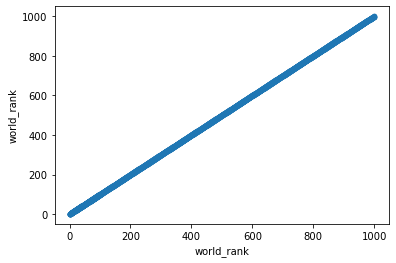

In [260]:
# a perfect postive Correlation
wur.plot(kind='scatter',x="world_rank",y='world_rank')

<AxesSubplot:xlabel='score', ylabel='world_rank'>

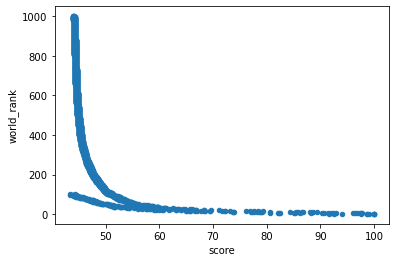

In [261]:
# negative Correlation
wur.plot(kind='scatter',x="score",y='world_rank')

<AxesSubplot:xlabel='quality_of_faculty', ylabel='score'>

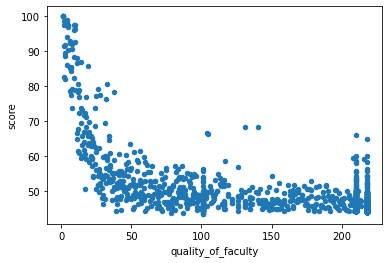

In [262]:
# negative Correlation
wur.plot(kind='scatter',x="quality_of_faculty",y='score')

<AxesSubplot:xlabel='national_rank', ylabel='year'>

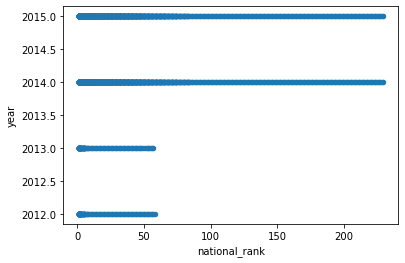

In [263]:
# almost no Correlation
wur.plot(kind='scatter',x="national_rank",y='year')

<AxesSubplot:xlabel='quality_of_education', ylabel='world_rank'>

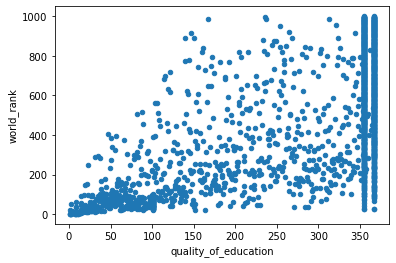

In [264]:
# positive Correlation
wur.plot(kind='scatter',x="quality_of_education",y='world_rank')

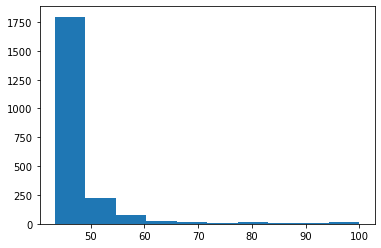

In [265]:
#as we can see most of the score in the dataFrame are around 25-50
plt.hist(wur["score"])
plt.show()

### as we can see the most institution are from the USA 

In [266]:
import plotly.express as px

In [267]:


# Group the data by country and count the number of institutions
country_counts = wur.groupby('country')['institution'].count().reset_index()

# Create a choropleth map with markers
fig = px.choropleth(
    country_counts, 
    locations='country', 
    locationmode='country names',
    color='institution',
    hover_name='country',
    title='Number of Institutions per Country',
    projection="natural earth"
    
)

# Add markers for the number of institutions
fig.update_traces(
    marker=dict(
        size=country_counts['institution'],
        line=dict(width=0.5, color='white')
    ),
    selector=dict(mode='markers')
)

fig.show()


In [268]:


# Group the data by country and count the number of institutions
country_counts = wur.groupby('country')['institution'].count().reset_index()

# Create a donut chart
fig = px.pie(country_counts, 
             values='institution', 
             names='country', 
             title='Number of Institutions per Country',
             hole=0.4)

# Customize the chart layout
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()


In [269]:
# as you can see most institution have the score of around 25-50
# Group the data by score and count the number of institution
institution_counts = wur.groupby('score')['institution'].count().reset_index()

# Create a funnel chart
fig = px.funnel(institution_counts, 
                x='score', 
                y='institution', 
                title='Funnel Chart of Score and institution')

fig.show()


# Feature Selection

In [270]:
from sklearn.feature_selection import f_classif
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression

In [271]:
corr_matrix = wur.corr()
corr_score = corr_matrix["score"].sort_values(ascending=False)
print(corr_score)

score                   1.000000
national_rank          -0.199130
year                   -0.234163
citations              -0.522592
world_rank             -0.549557
quality_of_education   -0.600328
quality_of_faculty     -0.693473
Name: score, dtype: float64


C:\Users\Eddie\AppData\Local\Temp\ipykernel_34536\1678507656.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# target variable "score".

In [272]:

# Select the relevant features based on correlation
selected_features = ["world_rank", "national_rank", "quality_of_education", "quality_of_faculty", "citations"]

# Create the feature and target variables
X = wur[selected_features]
y = wur["score"]

# Use RFE with a linear regression model to select the top 3 features
model = LinearRegression()
ex = ExhaustiveFeatureSelector(estimator=model, max_features=5,scoring="r2")
ex.fit(X, y)



Features: 31/31

ExhaustiveFeatureSelector(estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4]],
                          max_features=5, scoring='r2')

In [273]:
ex.best_feature_names_

('quality_of_education', 'quality_of_faculty')

In [274]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



# Select the relevant features based on correlation
selected_features = ["world_rank", "national_rank", "quality_of_education", "quality_of_faculty", "citations"]

# Create the feature and target variables
X = wur[selected_features]
y = wur["score"]

# Use RFE with a linear regression model to select the top 3 features
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X, y)

# Print the selected features and their rankings
for i in range(len(selected_features)):
    print(f"{selected_features[i]}: {rfe.ranking_[i]}")
    
# Create a new DataFrame with the selected features and target variable
X_selected = X.iloc[:, rfe.support_]
df_selected = pd.concat([X_selected, y], axis=1)


world_rank: 2
national_rank: 1
quality_of_education: 1
quality_of_faculty: 1
citations: 3


In this example, we first select the relevant features based on their correlation with the target variable, "score". We then use Recursive Feature Elimination (RFE) with a linear regression model to select the top 3 features from the selected features. Finally, we create a new DataFrame with the selected features and target variable.

In [275]:

# Select the relevant features based on correlation
selected_features = ["score", "national_rank", "quality_of_education", "quality_of_faculty", "citations"]

# Create the feature and target variables
X = wur[selected_features]
y = wur["world_rank"]

# Use RFE with a linear regression model to select the top 3 features
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X, y)

# Print the selected features and their rankings
for i in range(len(selected_features)):
    print(f"{selected_features[i]}: {rfe.ranking_[i]}")
    
# Create a new DataFrame with the selected features and target variable
X_selected = X.iloc[:, rfe.support_]
df_selected = pd.concat([X_selected, y], axis=1)


score: 1
national_rank: 2
quality_of_education: 1
quality_of_faculty: 3
citations: 1


### as you can see we switched between the "score" and "world_rank" 
#### which is the world_rank is related to score

In [276]:
wur

,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,citations,score,year
0,1.0,Harvard University,USA,1.0,7,1,1,100.00,2012
1,2.0,Massachusetts Institute of Technology,USA,2.0,9,3,4,91.67,2012
2,4.0,University of Cambridge,United Kingdom,1.0,10,4,11,86.17,2012
3,5.0,California Institute of Technology,USA,4.0,2,7,22,85.21,2012
4,6.0,Princeton University,USA,5.0,8,2,26,82.50,2012
...,...,...,...,...,...,...,...,...,...
2193,996.0,University of the Algarve,Portugal,7.0,367,218,812,44.03,2015
2194,997.0,Alexandria University,Egypt,4.0,236,218,645,44.03,2015
2195,998.0,Federal University of Ceará,Brazil,18.0,367,218,812,44.03,2015
2196,999.0,University of A Coruña,Spain,40.0,367,218,812,44.02,2015


In [277]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the top 3 features from the previous step
selected_features = ["quality_of_education", "quality_of_faculty", "national_rank"]

# Create the feature and target variables
X = wur[selected_features]
y = wur["score"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model's performance on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 37.68316745181896


# Machine Learning Model

### this is a basic example of applying a machine learning algorithm to predict the target variable (university scores) based on the selected features. The dataset is split into training and testing sets, and a linear regression model is trained on the training data. The accuracy of the model is then calculated using the mean squared error.

In [278]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create the feature and target variables using the selected features
X1 = wur[["quality_of_education", "quality_of_faculty", "national_rank"]]
y1 = wur["score"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1422)

# Train the linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the scores of the universities in the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model using the mean squared error
mse = np.mean((y_test - y_pred)**2)
accuracy = 1 - mse/np.var(y_test)

print(f"Accuracy of the model: {accuracy:.2f}")


Accuracy of the model: 0.52


In [279]:
X_train

,quality_of_education,quality_of_faculty,national_rank
1080,355,210,53.0
93,18,101,57.0
1317,52,95,61.0
379,273,109,80.0
552,355,210,2.0
...,...,...,...
1844,367,218,188.0
81,90,90,2.0
369,174,210,75.0
891,355,210,47.0


In [280]:
X_test

,quality_of_education,quality_of_faculty,national_rank
1203,13,9,4.0
917,355,210,204.0
1646,367,218,9.0
479,355,122,22.0
320,177,76,8.0
...,...,...,...
523,190,115,3.0
1570,367,218,5.0
500,355,210,27.0
769,355,210,13.0


In [281]:
y_train

1080    44.41
93      43.89
1317    49.73
379     48.47
552     45.80
        ...  
1844    44.43
81      45.21
369     48.67
891     44.65
872     44.68
Name: score, Length: 1758, dtype: float64

In [282]:
y_test

1203    96.14
917     44.62
1646    44.96
479     46.57
320     49.97
        ...  
523     46.12
1570    45.33
500     46.31
769     44.90
1834    44.44
Name: score, Length: 440, dtype: float64

In [283]:
y_pred 

array([61.38491253, 43.96852432, 44.51773164, 50.86247186, 55.52371301,
       44.53743894, 44.81963584, 44.99136018, 45.07609214, 45.09424899,
       50.08908244, 44.26506037, 44.79768711, 53.3349111 , 46.24986975,
       45.74257892, 44.91873278, 45.11845812, 47.26816418, 44.34826771,
       59.71022295, 44.56614991, 50.27302137, 44.00328757, 43.70067341,
       56.86998755, 44.54799306, 45.52053439, 54.47126975, 43.44647752,
       45.1971378 , 44.96109876, 45.17898095, 43.99273345, 43.84782158,
       44.45115653, 44.42089511, 44.47536566, 49.80213281, 57.06560301,
       44.1364378 , 45.18503324, 46.19085956, 44.82189625, 44.56009762,
       47.02880686, 44.53588849, 44.49957479, 45.75922142, 46.02022934,
       45.11240584, 45.16687639, 44.49352251, 50.44216219, 60.70512047,
       43.8293218 , 45.21378201, 43.85803277, 61.84604889, 45.11845812,
       44.56614991, 44.45720881, 45.07609214, 58.53033974, 53.24148145,
       44.94899419, 43.48279122, 44.34826771, 44.35432   , 46.03

In [284]:
def performance(actual, pred):
    print('R2 score = ',r2_score(actual, pred))
    print("MSE = ",mean_squared_error(actual,pred))
    print('MAE = ',mean_absolute_error(actual,pred))

In [285]:
performance(y_test,y_pred)

R2 score =  0.5182498124993573
MSE =  35.7476675603659
MAE =  2.679984512659228


In [286]:
####################################################################################################

In [287]:
lrM=LinearRegression()

In [288]:
lrM.fit(X_train,y_train)

LinearRegression()

In [289]:
X_train.columns

Index(['quality_of_education', 'quality_of_faculty', 'national_rank'], dtype='object')

In [290]:
X_train.describe()

,quality_of_education,quality_of_faculty,national_rank
count,1758.000000,1758.000000,1758.000000
mean,274.659841,178.639363,40.426052
std,122.228684,64.103881,51.653060
min,1.000000,1.000000,1.000000
25%,170.500000,172.000000,6.000000
50%,355.000000,210.000000,21.500000
75%,367.000000,218.000000,50.000000
max,367.000000,218.000000,229.000000


### NOTE: to predict for a new faculty the accuracy for this model is 50%

In [291]:
# i want to predict a new score for the institution


lrM.predict([[1,1,1]])

C:\Users\Eddie\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([62.03405728])

In [292]:
# i want to predict a new score for the institution


lrM.predict([[367,218,229]])

C:\Users\Eddie\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([43.18622934])